In [2]:
import numpy as np, pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
df1 = pd.read_csv("Real estate.csv")
df1.head()

,No,X1 transaction date,X2 house age,X3 bus station,X4 number of stores,X5 latitude,X6 longitude,Y price sq feet
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,92.1
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,82.4
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,93.6
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,97.3
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,99.9


In [4]:
print(df1.isnull().sum())

No                     0
X1 transaction date    0
X2 house age           0
X3 bus station         0
X4 number of stores    0
X5 latitude            0
X6 longitude           0
Y price sq feet        0
dtype: int64


In [5]:
df2 = df1[["X2 house age", "Y price sq feet"]]
df2.head()

,X2 house age,Y price sq feet
0,32.0,92.1
1,19.5,82.4
2,13.3,93.6
3,13.3,97.3
4,5.0,99.9


In [6]:
for i in df2:
    df2[i] = df2[i].apply(lambda x: df2[i].mean() if x == 0 else x)
print(df2)

     X2 house age  Y price sq feet
0            32.0             92.1
1            19.5             82.4
2            13.3             93.6
3            13.3             97.3
4             5.0             99.9
..            ...              ...
409          13.7             92.0
410           5.6            112.4
411          18.8             93.6
412           8.1            106.8
413           6.5            114.9

[414 rows x 2 columns]


C:\Users\DELL\AppData\Local\Temp\ipykernel_2784\3860960715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = df2[i].apply(lambda x: df2[i].mean() if x == 0 else x)


In [7]:
#The Mean, median and standard deviation
df2_mean_median_std = df2.agg(["mean", "median", "std"])
print(df2_mean_median_std)

        X2 house age  Y price sq feet
mean       18.439888        97.754106
median     16.500000        99.350000
std        10.786306        12.850456


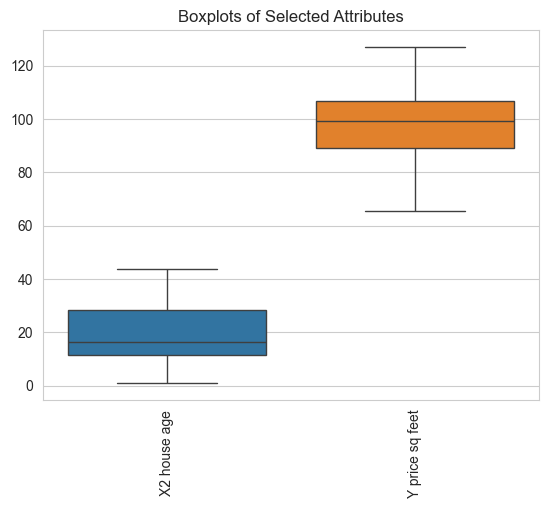

In [8]:
sns.set_style("whitegrid")

# Boxplots
sns.boxplot(data=df2)
plt.xticks(rotation=90)
plt.title("Boxplots of Selected Attributes")
plt.show()

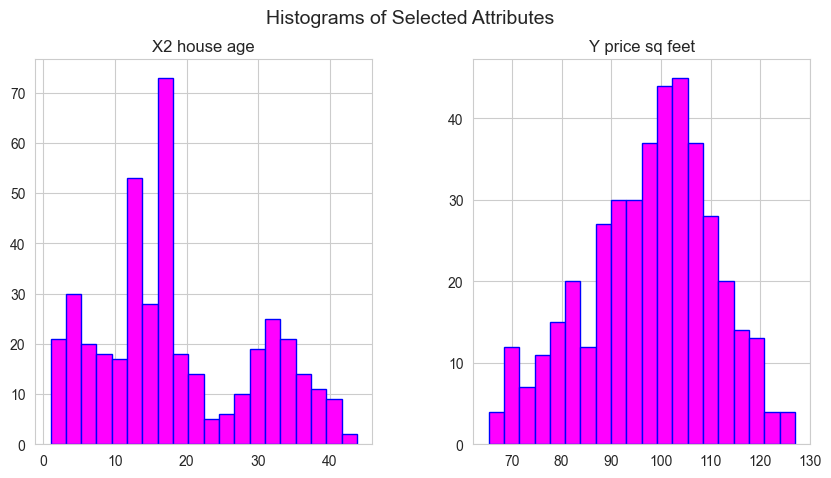

In [9]:
# Histograms
df2.hist(figsize=(10, 5), bins=20, edgecolor="blue", color='magenta')
plt.suptitle("Histograms of Selected Attributes", fontsize=14)
plt.show()

In [10]:
normlzd_df2 = (df2 - df2.mean())/df2.std()

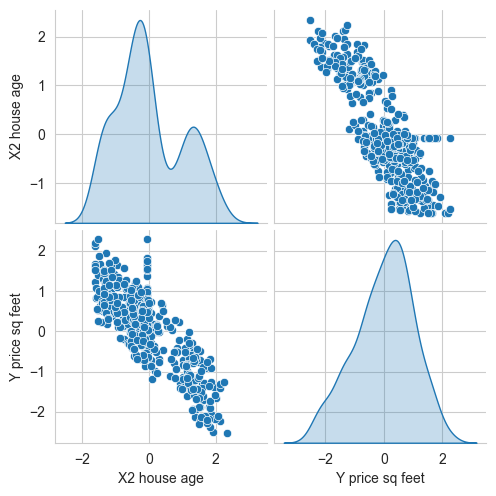

In [11]:
# Scatter plots for correlation
sns.pairplot(normlzd_df2, diag_kind="kde")
plt.show()

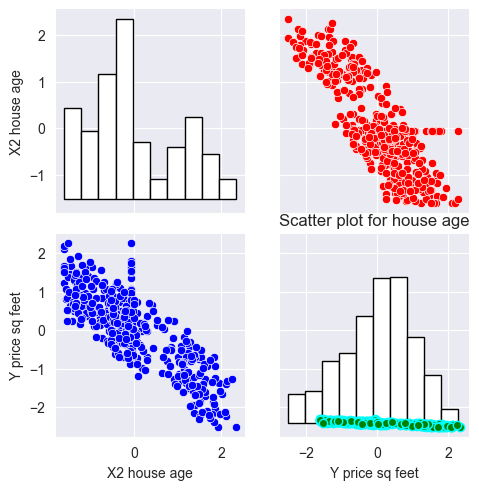

In [12]:
sns.set_style("darkgrid")

g = sns.PairGrid(normlzd_df2)
g.map_upper(sns.scatterplot,color='red')
g.map_lower(sns.scatterplot, color='blue')
g.map_diag(plt.hist, color='white', edgecolor='black')
plt.scatter(x=normlzd_df2["X2 house age"], y=normlzd_df2["Y price sq feet"], color='green', edgecolors='cyan')
plt.title(f'Scatter plot for house age')
plt.show()

R² score for House Age (X2) vs. Price per Sq Feet (Y): 0.6954


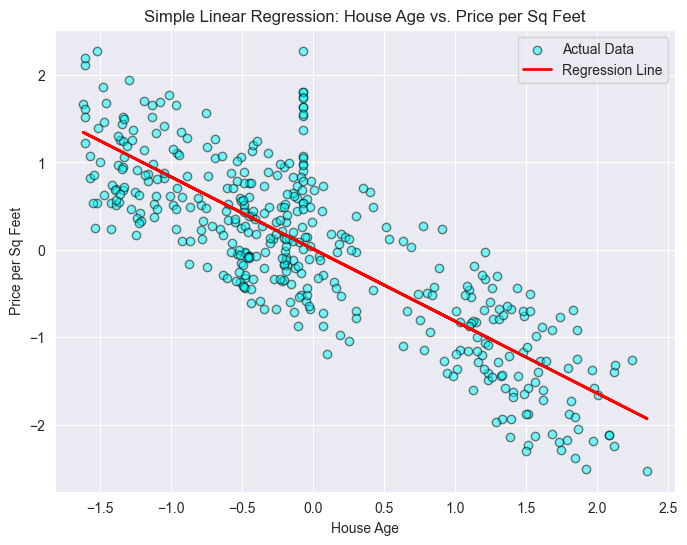

In [13]:
# Simple Linear Regression (House Age vs. Price per sq feet)
X = normlzd_df2["X2 house age"].values.reshape(-1, 1)
y = normlzd_df2["Y price sq feet"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
r2_score = model.score(X_test, y_test)
print(f"R² score for House Age (X2) vs. Price per Sq Feet (Y): {r2_score:.4f}")
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="cyan", alpha=0.5, label="Actual Data", edgecolors="black")
plt.plot(X, model.predict(X), color="red", linewidth=2, label="Regression Line")
plt.xlabel("House Age")
plt.ylabel("Price per Sq Feet")
plt.title("Simple Linear Regression: House Age vs. Price per Sq Feet")
plt.legend()
plt.show()

In [14]:
normlzd_df1 = (df1 - df1.mean())/df1.std()

R² score for Bus Station (X3) vs. Price per Sq Feet (Y): -0.0391


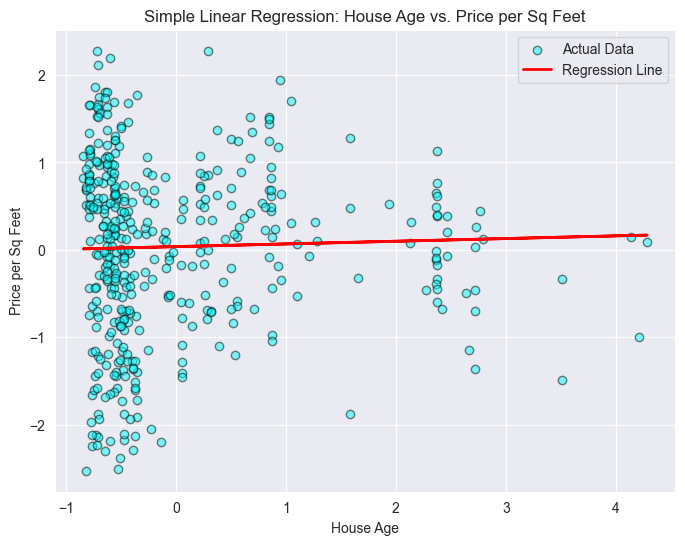

In [15]:
# Simple Linear Regression (Bus Station vs. Price per sq feet)
X = normlzd_df1["X3 bus station"].values.reshape(-1, 1)
y = normlzd_df1["Y price sq feet"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
r2_score = model.score(X_test, y_test)
print(f"R² score for Bus Station (X3) vs. Price per Sq Feet (Y): {r2_score:.4f}")

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="cyan", alpha=0.5, label="Actual Data", edgecolors="black")
plt.plot(X, model.predict(X), color="red", linewidth=2, label="Regression Line")
plt.xlabel("House Age")
plt.ylabel("Price per Sq Feet")
plt.title("Simple Linear Regression: House Age vs. Price per Sq Feet")
plt.legend()
plt.show()

R² score for Number of Stores (X4) vs. Price per Sq Feet (Y): -0.0334


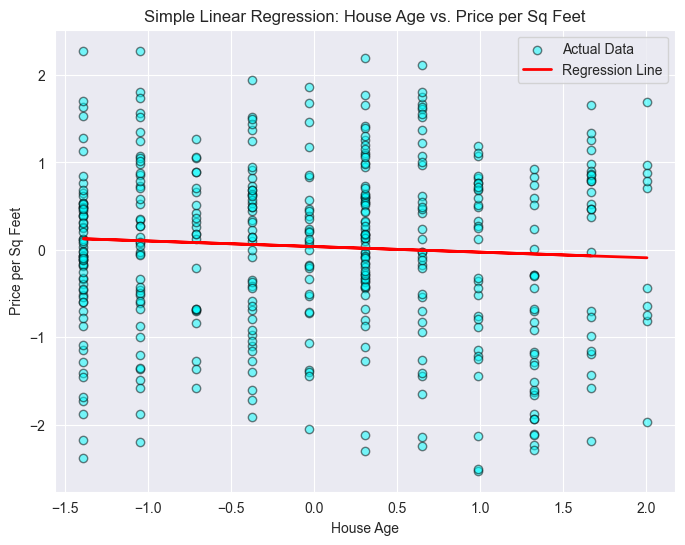

In [16]:
# Simple Linear Regression (No of stores vs. Price per sq feet)
X = normlzd_df1["X4 number of stores"].values.reshape(-1, 1)
y = normlzd_df2["Y price sq feet"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
r2_score = model.score(X_test, y_test)
print(f"R² score for Number of Stores (X4) vs. Price per Sq Feet (Y): {r2_score:.4f}")

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="cyan", alpha=0.5, label="Actual Data", edgecolors="black")
plt.plot(X, model.predict(X), color="red", linewidth=2, label="Regression Line")
plt.xlabel("House Age")
plt.ylabel("Price per Sq Feet")
plt.title("Simple Linear Regression: House Age vs. Price per Sq Feet")
plt.legend()
plt.show()

R² score for latitude (X5) and longitude (X6) vs. Price per Sq Feet (Y): -0.0341


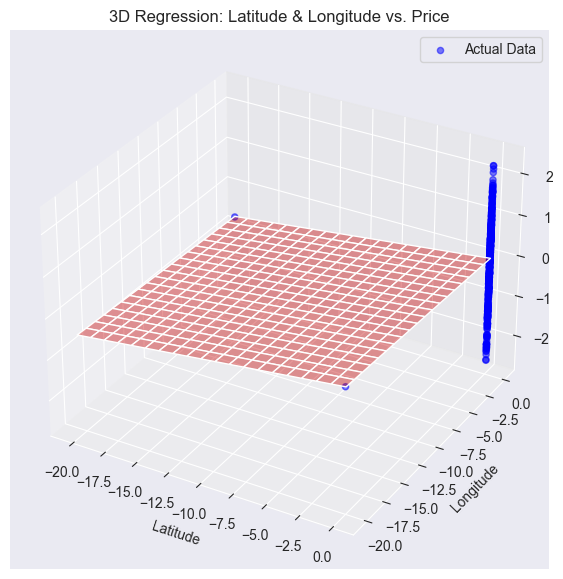

In [17]:
# Simple Linear Regression (latitude and longitude vs. Price per sq feet)
X = normlzd_df1[["X5 latitude", "X6 longitude"]].values
y = normlzd_df1["Y price sq feet"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
r2_score = model.score(X_test, y_test)
print(f"R² score for latitude (X5) and longitude (X6) vs. Price per Sq Feet (Y): {r2_score:.4f}")

# Create a 3D scatter plot with regression plane since X5 latitude and X6 longitude are independent attributes
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data points
ax.scatter(normlzd_df1["X5 latitude"], normlzd_df1["X6 longitude"], normlzd_df1["Y price sq feet"], 
           color="blue", alpha=0.5, label="Actual Data")

# Generate a grid of values for latitude & longitude
lat_vals = np.linspace(normlzd_df1["X5 latitude"].min(), normlzd_df1["X5 latitude"].max(), 20)
long_vals = np.linspace(normlzd_df1["X6 longitude"].min(), normlzd_df1["X6 longitude"].max(), 20)
lat_vals, long_vals = np.meshgrid(lat_vals, long_vals)
grid_points = np.c_[lat_vals.ravel(), long_vals.ravel()]

# Predict price values for the grid to create the regression plane
predicted_prices = model.predict(grid_points).reshape(lat_vals.shape)

# Plot regression plane
ax.plot_surface(lat_vals, long_vals, predicted_prices, color="red", alpha=0.4)

# Labels and title
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Price per Sq Feet")
ax.set_title("3D Regression: Latitude & Longitude vs. Price")

plt.legend()
plt.show()